<a href="https://colab.research.google.com/github/Jundula/ML/blob/main/Stocks_Sentiment_Analysis_Using_AI_NATIJ_Abdallah_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK #1: UNDESTAND THE PROBLEM STATEMENT AND BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1djxup79_KiGtKFiH7AgSD0Bj-2D90TBg)

In [ ]:
# How to display image in Jupyter
#from IPython.display import Image
#Image(filename='test.png')

#TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [6]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [1]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# install nltk
# NLTK: Natural Language tool kit
!pip install nltk

In [3]:
# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!pip install gensim

In [7]:
# load the stock news data
stock_df = pd.read_csv("/content/drive/MyDrive/Neoma2025/stock_sentiment.csv")

In [11]:
# Let's view the dataset
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [12]:
# dataframe information
print(stock_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB
None


In [ ]:
# check for null values
df = pd.DataFrame(columns=["Text", "Sentiment"])
print(df.count())

Text         0
Sentiment    0
dtype: int64

**MINI CHALLENGE #1:**

- **How many unique elements are present in the 'sentiment' column? Try to find out with two different methods**

In [14]:
unique_count = stock_df['Sentiment'].nunique()
print(f"Number of unique elements: {unique_count}")

Number of unique elements: 2


#TASK #3: PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)



In [15]:
# This is a set of punctuation signs we need to remove !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
# How to get this list?
# Code here
import string

punctuation_list = string.punctuation
print(punctuation_list)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
# remove punctuation for this sentence Test = '$I love AI & Machine learning!!'
# Code here
test = '$I love AI & Machine learning!!'

# Remove punctuation
translator = str.maketrans('', '', string.punctuation)
clean_text = test.translate(translator)

print(clean_text)

I love AI  Machine learning


In [20]:
# Remove punctuation for Test = 'Good morning beautiful people :)... #I am having fun learning Finance with Python!!'
# It must respond with a list
# Code here

test = 'Good morning beautiful people :)... #I am having fun learning Finance with Python!!'


translator = str.maketrans('', '', string.punctuation)
clean_text = test.translate(translator)


result = clean_text.split()

print(result)

['Good', 'morning', 'beautiful', 'people', 'I', 'am', 'having', 'fun', 'learning', 'Finance', 'with', 'Python']


In [19]:
test = 'Good morning beautiful people :)... #I am having fun learning Finance with Python!!'


translator = str.maketrans('', '', string.punctuation)
clean_text = test.translate(translator)


result = list(clean_text)

print(result)

['G', 'o', 'o', 'd', ' ', 'm', 'o', 'r', 'n', 'i', 'n', 'g', ' ', 'b', 'e', 'a', 'u', 't', 'i', 'f', 'u', 'l', ' ', 'p', 'e', 'o', 'p', 'l', 'e', ' ', ' ', 'I', ' ', 'a', 'm', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'f', 'u', 'n', ' ', 'l', 'e', 'a', 'r', 'n', 'i', 'n', 'g', ' ', 'F', 'i', 'n', 'a', 'n', 'c', 'e', ' ', 'w', 'i', 't', 'h', ' ', 'P', 'y', 't', 'h', 'o', 'n']


['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'F',
 'i',
 'n',
 'a',
 'n',
 'c',
 'e',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'P',
 'y',
 't',
 'h',
 'o',
 'n']

In [24]:
# Join the characters again to form the string.
# Original text
test = 'Good morning beautiful people :)... #I am having fun learning Finance with Python!!'

# Remove punctuation
translator = str.maketrans('', '', string.punctuation)
clean_text = test.translate(translator)

# This will maintain the original spacing
print(clean_text)

Good morning beautiful people  I am having fun learning Finance with Python


In [25]:
# Let's define a function to remove punctuations
def remove_punctuation(text):
   import string
   translator = str.maketrans('', '', string.punctuation)
   clean_text = text.translate(translator)
   return clean_text

In [31]:
# Let's remove punctuations from our dataset
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punctuation)


In [32]:
stock_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [35]:
stock_df['Text'].iloc[2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [36]:
stock_df['Text Without Punctuation'].iloc[2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

**MINI CHALLENGE #2:**
- **Remove punctuations using a different method**

In [37]:
import re

def remove_punctuation_regex(text):
   return re.sub(r'[^\w\s]', '', text)

# Apply to dataframe
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punctuation_regex)

# TASK #4: PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [38]:
# download stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords

# Get English stopwords
stop_words = stopwords.words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [40]:
# Remove stopwords and remove short words (less than 2 characters)
def clean_text(text):
   # Remove punctuation
   text = remove_punctuation(text)

   # Tokenize into words
   words = text.split()

   # Remove stopwords and short words
   filtered_words = [word for word in words if word.lower() not in stop_words and len(word) > 2]

   # Join back into a string
   return ' '.join(filtered_words)

# Apply to dataframe
stock_df['Text Without Punc & Stopwords'] = stock_df['Text'].apply(clean_text)

In [41]:
# apply pre-processing to the text column
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,Kickers watchlist XIDE TIT SOQ PNK CPW BPZ tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,user AAP MOVIE return FEAGEED indicator trades...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,user afraid short AMZN looking like nearmonopo...
3,MNTA Over 12.00,1,MNTA Over 1200,MNTA 1200
4,OI Over 21.37,1,OI Over 2137,2137
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,Industry body CII said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,Gold prices slip 46000 investors book profits ...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,Workers Bajaj Auto agreed wage cut period Apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off days high up 600 p...,Sharemarket LIVE Sensex day’s high 600 points ...


In [43]:
stock_df['Text Without Punc & Stopwords'].iloc[0]

'Kickers watchlist XIDE TIT SOQ PNK CPW BPZ trade method method see prev posts'

In [44]:
def clean_text_to_list(text):
    # Remove punctuation
    text = remove_punctuation(text)

    # Tokenize into words and convert to lowercase
    words = [word.lower() for word in text.split()]

    # Remove stopwords and short words
    filtered_words = [word for word in words if word.lower() not in stop_words and len(word) > 2]

    return filtered_words

# Apply to dataframe
stock_df['Text Without Punc & Stopwords'] = stock_df['Text'].apply(clean_text_to_list)

In [46]:
stock_df['Text Without Punc & Stopwords'].iloc[0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [ ]:
# join the words into a string
# stock_df['Processed Text 2'] = stock_df['Processed Text 2'].apply(lambda x: " ".join(x))

In [58]:
def clean_text_to_list(text):
    # Remove punctuation
    text = remove_punctuation(text)

    # Tokenize into words and convert to lowercase
    words = [word.lower() for word in text.split()]

    # Remove stopwords, short words, and words containing numbers
    filtered_words = [word for word in words if word.lower() not in stop_words
                     and len(word) > 2
                     and not any(char.isdigit() for char in word)]

    return filtered_words

# Apply to dataframe
stock_df['Text Without Punc & Stopwords'] = stock_df['Text'].apply(clean_text_to_list)


In [59]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[user, aap, movie, return, feageed, indicator,...",user aap movie return feageed indicator trades...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[user, afraid, short, amzn, looking, like, nea...",user afraid short amzn looking like nearmonopo...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off days high up 600 p...,"[sharemarket, live, sensex, day’s, high, point...",sharemarket live sensex day’s high points nift...


,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


**MINI CHALLENGE #3:**

- **Modify the code in order keep words that are longer than or equal 2 characters instead of 3**
- **Add 'https' to the list of stopwords and rerun the code**



In [50]:
def clean_text_to_list(text):
   # Remove punctuation
   text = remove_punctuation(text)

   # Add 'https' to stopwords
   custom_stopwords = stop_words + ['https']

   # Tokenize into words and convert to lowercase
   words = [word.lower() for word in text.split()]

   # Remove stopwords, words shorter than 2 chars, and words containing numbers
   filtered_words = [word for word in words if word.lower() not in custom_stopwords
                    and len(word) >= 2
                    and not any(char.isdigit() for char in word)]

   return filtered_words

# Apply to dataframe
stock_df['Text Without Punc & Stopwords'] = stock_df['Text'].apply(clean_text_to_list)

# TASK #5: PLOT WORDCLOUD

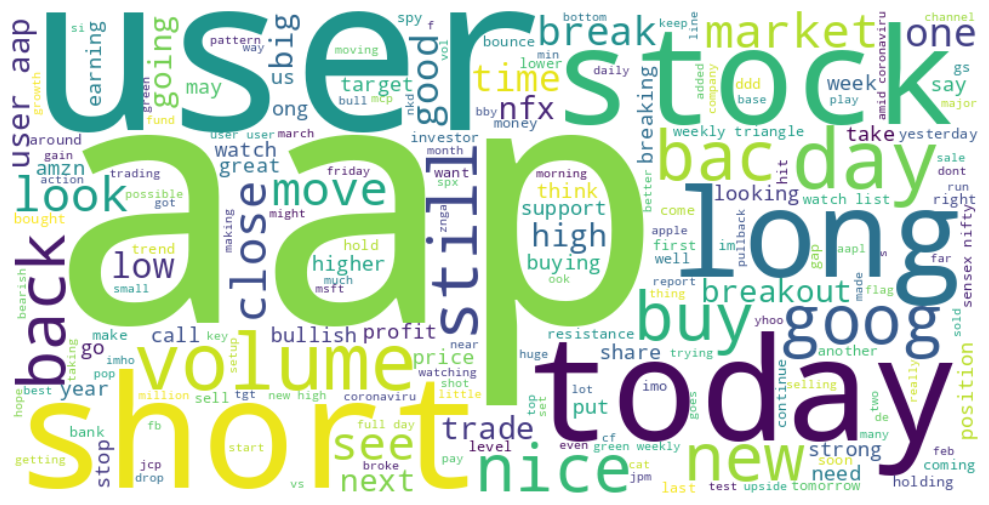

In [51]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all words in the dataset
all_words = ' '.join([' '.join(words) for words in stock_df['Text Without Punc & Stopwords']])

# Generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

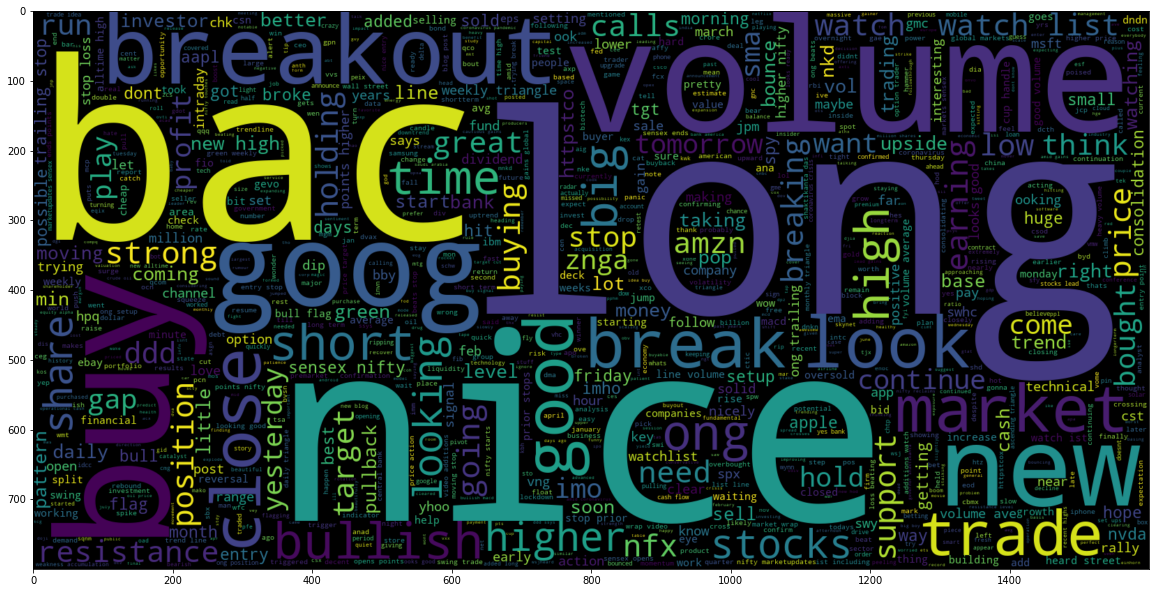

**MINI CHALLENGE #4:**
- **Visualize the wordcloud for tweets that have negative sentiment**

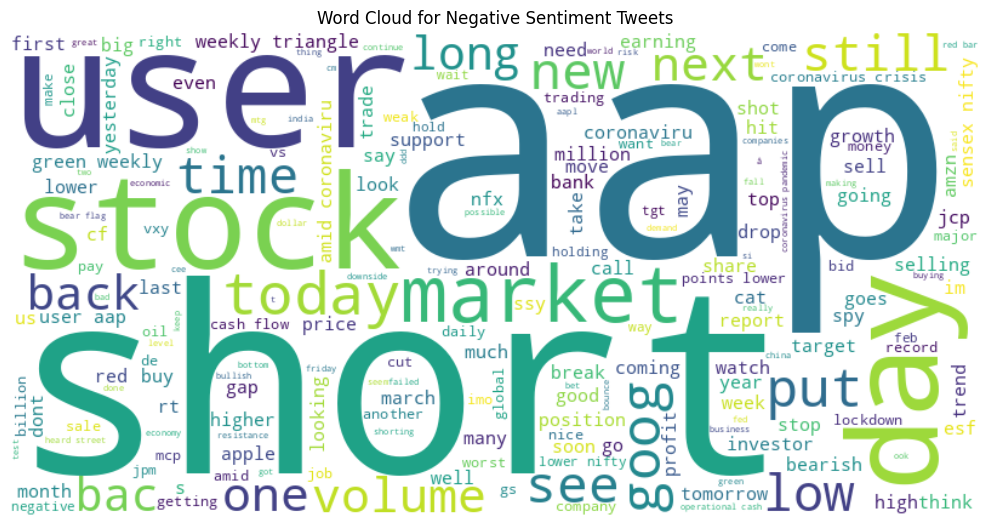

In [53]:
# Filter for tweets with negative sentiment
negative_tweets = stock_df[stock_df['Sentiment'] == 0]

# Join all words from negative tweets
negative_words = ' '.join([' '.join(words) for words in negative_tweets['Text Without Punc & Stopwords']])

# Generate wordcloud for negative sentiment
neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

# Display the wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment Tweets')
plt.tight_layout()
plt.show()

# TASK #6: VISUALIZE CLEANED DATASETS

In [60]:
def clean_text_to_list(text):
    # Remove punctuation
    text = remove_punctuation(text)

    # Tokenize into words and convert to lowercase
    words = [word.lower() for word in text.split()]

    # Remove stopwords, short words, and words containing numbers
    filtered_words = [word for word in words if word.lower() not in stop_words
                     and len(word) > 2
                     and not any(char.isdigit() for char in word)]

    return filtered_words

# Apply to dataframe
stock_df['Text Without Punc & Stopwords'] = stock_df['Text'].apply(clean_text_to_list)
stock_df['Text Without Punc & Stopwords Joined'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: ' '.join(x))
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[user, aap, movie, return, feageed, indicator,...",user aap movie return feageed indicator trades...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[user, afraid, short, amzn, looking, like, nea...",user afraid short amzn looking like nearmonopo...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off days high up 600 p...,"[sharemarket, live, sensex, day’s, high, point...",sharemarket live sensex day’s high points nift...


,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [66]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

# Tokenize the text
tokenized_text = word_tokenize(stock_df['Text Without Punc & Stopwords Joined'].iloc[0])
print(tokenized_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [73]:
# word_tokenize is used to break up a string into words
print(stock_df['Text Without Punc & Stopwords Joined'].iloc[0])
tokenized_text

kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts


['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [76]:
# Function to count words in the cleaned text lists
def count_words_in_list(word_list):
    return len(word_list)

# Apply to each row's word list
word_counts = stock_df['Text Without Punc & Stopwords'].apply(count_words_in_list)

# Get the maximum length
max_length = word_counts.max()
print(f"The maximum number of words in any document is: {max_length}")

The maximum number of words in any document is: 20


In [88]:
print(word_counts.tolist())

[14, 9, 9, 1, 0, 1, 10, 13, 8, 5, 10, 18, 9, 9, 11, 5, 14, 10, 13, 4, 6, 6, 2, 5, 3, 10, 3, 3, 10, 6, 11, 12, 9, 3, 11, 11, 4, 9, 13, 11, 11, 8, 10, 10, 4, 9, 8, 7, 7, 7, 10, 9, 8, 2, 14, 13, 9, 8, 1, 14, 8, 12, 6, 14, 6, 6, 7, 5, 6, 10, 10, 4, 11, 13, 17, 6, 10, 8, 2, 11, 5, 4, 10, 11, 15, 4, 11, 5, 6, 3, 1, 6, 9, 4, 7, 6, 7, 10, 1, 3, 9, 4, 16, 8, 11, 11, 18, 7, 8, 13, 12, 10, 4, 4, 11, 11, 10, 6, 10, 5, 5, 8, 9, 15, 3, 5, 9, 19, 13, 11, 3, 1, 1, 2, 7, 13, 12, 5, 9, 9, 8, 10, 15, 7, 9, 10, 12, 11, 6, 10, 13, 4, 12, 9, 16, 14, 9, 12, 5, 5, 3, 8, 2, 4, 10, 7, 6, 12, 6, 16, 9, 6, 5, 11, 10, 12, 9, 2, 11, 9, 11, 12, 8, 10, 8, 3, 6, 6, 9, 8, 4, 6, 5, 4, 5, 11, 12, 8, 9, 13, 9, 7, 10, 12, 8, 7, 7, 3, 11, 11, 6, 9, 11, 16, 10, 8, 12, 7, 12, 11, 4, 4, 3, 11, 2, 9, 10, 15, 12, 10, 14, 9, 8, 3, 1, 12, 13, 6, 10, 10, 12, 5, 3, 4, 9, 6, 15, 6, 7, 7, 9, 1, 1, 12, 7, 14, 4, 4, 9, 6, 4, 9, 10, 10, 14, 5, 13, 4, 4, 6, 1, 8, 5, 11, 5, 6, 12, 4, 11, 10, 9, 6, 10, 3, 10, 11, 2, 9, 11, 14, 6, 9, 3, 2, 8

In [ ]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated


The maximum number of words in any document is: 19


[13,
 6,
 7,
 1,
 0,
 1,
 7,
 13,
 8,
 4,
 8,
 14,
 8,
 8,
 10,
 5,
 10,
 8,
 12,
 4,
 5,
 4,
 1,
 5,
 3,
 9,
 3,
 3,
 9,
 6,
 6,
 8,
 7,
 3,
 10,
 9,
 4,
 8,
 10,
 9,
 8,
 3,
 9,
 5,
 4,
 10,
 8,
 4,
 7,
 9,
 10,
 9,
 7,
 2,
 14,
 11,
 8,
 8,
 1,
 14,
 7,
 10,
 4,
 13,
 6,
 6,
 6,
 5,
 6,
 7,
 9,
 4,
 8,
 13,
 16,
 6,
 8,
 6,
 2,
 9,
 5,
 4,
 8,
 9,
 16,
 4,
 8,
 5,
 6,
 2,
 1,
 5,
 8,
 3,
 7,
 6,
 6,
 8,
 1,
 3,
 7,
 4,
 14,
 8,
 9,
 9,
 18,
 6,
 6,
 12,
 10,
 7,
 3,
 3,
 10,
 10,
 7,
 6,
 8,
 5,
 4,
 7,
 9,
 13,
 2,
 4,
 8,
 14,
 13,
 10,
 3,
 1,
 1,
 2,
 7,
 11,
 11,
 8,
 8,
 10,
 9,
 10,
 13,
 6,
 7,
 8,
 11,
 9,
 6,
 10,
 10,
 4,
 8,
 8,
 12,
 11,
 7,
 11,
 4,
 5,
 3,
 7,
 2,
 4,
 9,
 4,
 6,
 10,
 5,
 15,
 7,
 5,
 5,
 9,
 9,
 8,
 8,
 2,
 8,
 9,
 8,
 11,
 7,
 8,
 6,
 3,
 5,
 5,
 8,
 9,
 4,
 6,
 5,
 4,
 3,
 6,
 10,
 7,
 6,
 9,
 8,
 7,
 9,
 11,
 8,
 5,
 5,
 3,
 10,
 11,
 6,
 9,
 9,
 12,
 9,
 6,
 6,
 7,
 10,
 10,
 3,
 3,
 2,
 10,
 2,
 9,
 8,
 14,
 10,
 9,
 12,
 6,
 7,
 2,
 1,
 12,
 1

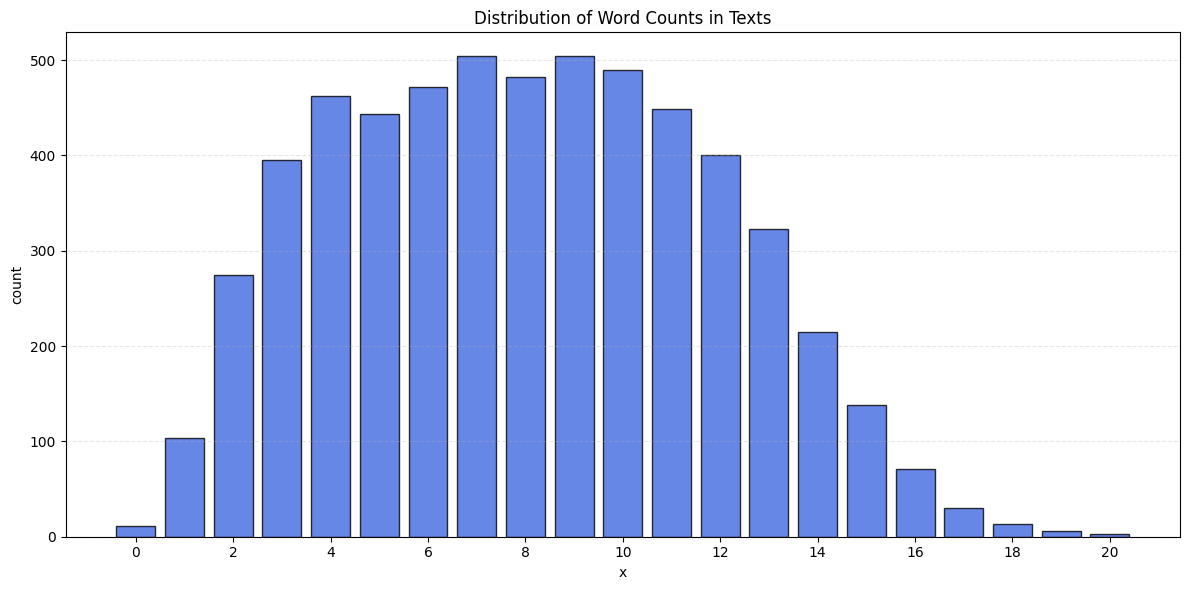

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import collections

# Count frequency of each word count
count_freq = collections.Counter(word_counts)

# Convert to sorted lists for plotting
x_values = range(0, max(word_counts) + 1)
y_values = [count_freq[i] for i in x_values]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x_values, y_values, color='royalblue', alpha=0.8, edgecolor='black')
plt.title('Distribution of Word Counts in Texts')
plt.xlabel('x')
plt.ylabel('count')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xticks(np.arange(0, max(word_counts) + 1, 2))
plt.tight_layout()
plt.show()

In [ ]:
# Plot the distribution for the number of words in a text


**MINI CHALLENGE #5:**
- **Use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments class**

<ipython-input-96-f80667f3abe0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=stock_df, palette='viridis')


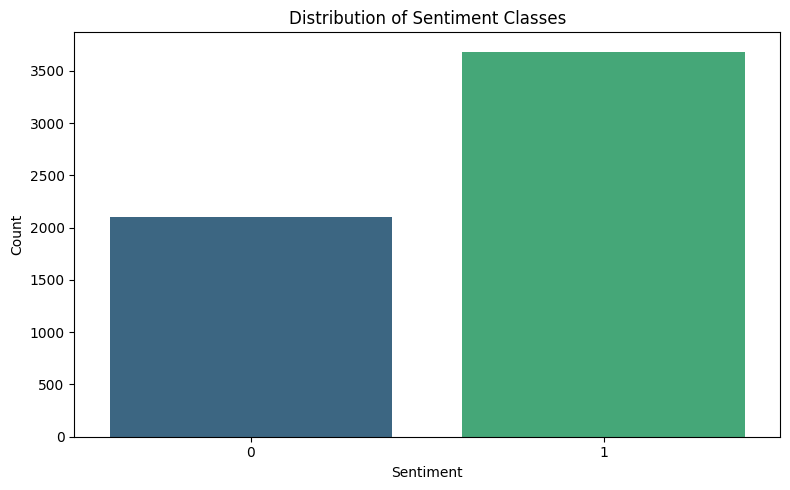

In [96]:
import seaborn as sns

# Create countplot for sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=stock_df, palette='viridis')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# TASK #7: PREPARE THE DATA BY TOKENIZING AND PADDING

![alt text](https://drive.google.com/uc?id=13j8m-JOpK994CtukR1EShiY_hGGjkNx-)

In [97]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[user, aap, movie, return, feageed, indicator,...",user aap movie return feageed indicator trades...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[user, afraid, short, amzn, looking, like, nea...",user afraid short amzn looking like nearmonopo...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off days high up 600 p...,"[sharemarket, live, sensex, day’s, high, point...",sharemarket live sensex day’s high points nift...


,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [98]:
# Count total words
total_words = sum(word_counts)
print(f"Total words in the dataset: {total_words}")


Total words in the dataset: 46638


In [101]:
# Get all unique words in the dataset
all_words = []
for word_list in stock_df['Text Without Punc & Stopwords']:
   all_words.extend(word_list)

# Print the list of all words
print(all_words)

['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts', 'user', 'aap', 'movie', 'return', 'feageed', 'indicator', 'trades', 'year', 'awesome', 'user', 'afraid', 'short', 'amzn', 'looking', 'like', 'nearmonopoly', 'ebooks', 'infrastructureasaservice', 'mnta', 'pgnx', 'aap', 'user', 'current', 'downtrend', 'break', 'otherwise', 'shortterm', 'correction', 'medterm', 'downtrend', 'mondays', 'relative', 'weakness', 'nyx', 'win', 'tie', 'tap', 'ice', 'int', 'bmc', 'aon', 'chk', 'biib', 'goog', 'ower', 'trend', 'line', 'channel', 'test', 'volume', 'support', 'aap', 'watch', 'tomorrow', 'ong', 'entry', 'assuming', 'fcx', 'opens', 'tomorrow', 'trigger', 'buy', 'still', 'much', 'like', 'setup', 'really', 'worries', 'everyone', 'expects', 'market', 'rally', 'nowusually', 'exact', 'opposite', 'happens', 'every', 'time', 'shall', 'see', 'soon', 'bac', 'spx', 'jpm', 'aap', 'gamcos', 'arry', 'haverty', 'apple', 'extremely', 'cheap', 'gr

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'like',
 'setup',
 'worries',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'time',
 'shall',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 'apple',
 'extremely',
 'cheap',
 'great',
 'video',
 'maykiljil',
 'posted',
 'agree',
 'msft',
 'going',
 'hig

In [102]:
# Count unique words
unique_words = set(all_words)
print(f"Total number of unique words: {len(unique_words)}")

Total number of unique words: 8668


In [ ]:
# Obtain the total number of unique words


9113

In [138]:
from sklearn.model_selection import train_test_split

# Get feature and target
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 4632
Testing set size: 1159


In [133]:
len(train_words)

7612

In [134]:
len(test_words)

3401

(5211,)

(580,)

In [140]:
from sklearn.utils import shuffle

# Mélanger X_train et y_train simultanément
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)

# Afficher les premiers éléments pour vérifier que le mélange a eu lieu
print(X_train_shuffled)

5238    [allstate, said, would, dispatch, million, she...
4053    [reasons, avoid, monster, beverage, shares, mn...
834                          [nvda, ihs, daily, oversold]
5471    [sensex, falls, points, nifty, slides, amid, v...
4912    [major, game, consoles, stream, month, old, ga...
                              ...                        
1707    [ocz, pleasantly, surprised, fio, results, aff...
2673                          [goog, stop, loss, beating]
526                  [new, short, board, utility, sector]
5386    [heard, street, booming, sales, supermarkets, ...
420     [hpq, option, traders, buy, aug, bet, stock, a...
Name: Text Without Punc & Stopwords, Length: 4632, dtype: object


5238    [allstate, said, dispatch, million, shelterinp...
3414    [traders, attracted, round, numbers, like, sur...
2669                       [time, break, inverse, target]
1114    [mcp, short, zero, play, goes, vxy, tvix, evap...
3723    [printed, babys, gonna, pop, tomorrow, share, ...
                              ...                        
4083               [chtp, like, flag, expecting, shortly]
1965    [bullish, signal, want, close, preferably, con...
681              [bac, swing, trade, protecting, profits]
188     [znga, fat, juicy, short, lower, levels, close...
3421    [goog, gonna, hit, tomorrow, prob, check, fact...
Name: Text Without Punc & Stopwords, Length: 5211, dtype: object

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words



In [143]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Get vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")

Vocabulary Size: 7649


[[3500, 264, 3501, 72, 2389, 3502, 3503, 3504, 3505],
 [326, 3506, 1201, 629, 3, 212, 500, 2390],
 [19, 25, 1202, 33],
 [197, 1, 1808, 113, 118, 296, 3507, 3508],
 [2391, 3509, 501, 170, 66, 123, 12, 2392, 1203, 265, 1204, 124],
 [630, 902, 46, 139, 71, 182, 30, 83, 8, 38],
 [3510, 1809, 1810, 3511, 198, 43, 89, 1811, 1436, 1812, 3512, 3513],
 [5, 125, 2, 75, 240, 703],
 [2393, 3514, 381, 327, 3515, 461, 1437],
 [19, 1438, 3516, 191, 3517, 165, 631],
 [1813, 1439, 903, 1205, 153, 2394, 266, 904, 1814, 14, 154, 1206, 1, 791],
 [5, 2],
 [1033, 22, 108, 159, 199, 704, 4, 95, 360],
 [462, 29, 48, 27],
 [56, 23, 3518, 792, 1815, 3519, 463],
 [31, 61, 1034, 382, 140, 2, 1816, 102, 502, 3520],
 [1035, 109],
 [632, 3521, 1440, 580, 2395],
 [3522, 2396, 2397, 1207, 18, 581],
 [241, 328, 793, 3, 19, 12, 107, 88, 12, 66],
 [198, 222, 2398, 192, 1817, 70],
 [1441, 109, 4, 126, 11],
 [1036,
  3523,
  1818,
  1442,
  1819,
  3524,
  429,
  3525,
  3526,
  1820,
  2399,
  2400,
  383,
  2399,
  3527]

[[7, 30, 2250, 140, 232, 30, 645, 3456],
 [6, 25, 461, 42, 66, 2066, 35, 284, 62, 26, 2288],
 [788, 2837, 866, 65, 5, 816, 1529],
 [6, 3058, 4992, 755, 8538, 562],
 [100, 1669, 1181, 130, 175, 19],
 [958, 29, 174, 95, 98, 242, 52, 34, 64, 948],
 [190, 126, 320, 761, 369, 126, 517, 3972],
 [848, 1023, 421, 66],
 [208, 39, 3, 486, 74, 23, 596, 216, 5],
 [148, 243, 53, 213, 1416, 1214, 1214],
 [293, 7810, 1619, 16, 408, 49, 409, 203, 37],
 [1301, 984, 3170, 332, 1, 227],
 [118, 1, 272],
 [228, 6933, 553, 5238, 937],
 [305, 116],
 [16, 624, 188, 574, 9, 428, 367, 5161, 1540, 356, 7634],
 [2297, 890, 75, 212, 52, 374],
 [4277, 7545, 4747, 6288],
 [67, 237, 71, 4, 2518, 1019],
 [26, 17, 125, 64],
 [5084, 480, 508, 782, 2182, 545, 564, 14, 750],
 [1167, 77, 71],
 [1611, 2006, 1531, 253, 1072, 1102, 85, 173, 2482, 690],
 [35, 26, 17, 1],
 [9, 134, 92],
 [6, 1, 54, 65, 103, 66, 427, 5, 514, 1116],
 [652, 170, 2],
 [169, 19, 996, 2031, 53, 2738],
 [7062, 1170, 1272, 2902, 2123, 2918, 2597, 6080,

The encoding for document
 3414    [traders, attracted, round, numbers, like, sur...
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [326, 3506, 1201, 629, 3, 212, 500, 2390]


In [151]:
# Add padding to training and testing
max_sequence_length = 20  # Adjust this as per the maximum length you want

# Pad sequences to make them of equal length (here, we use 'post' padding)
sequences_padded_train = pad_sequences(X_train_seq, padding='post', maxlen=max_sequence_length)
sequences_padded_test = pad_sequences(X_test_seq, padding='post', maxlen=max_sequence_length)

# Display the padded sequences for each document
for i, seq in enumerate(sequences_padded_train[:8]):  # Display first 3 sequences
    print(f"The padded encoding for document: {i + 1} is: {seq}")

The padded encoding for document: 1 is: [ 561 2254   79  197  994  176 1164    1 1710    0    0    0    0    0
    0    0    0    0    0    0]
The padded encoding for document: 2 is: [ 336  149  462  319  286  105  616   60 1711 2255   62  337  305 3325
  286    0    0    0    0    0]
The padded encoding for document: 3 is: [ 271 3326    1 3327  463 1712 2256 2257   12 1371 2258    0    0    0
    0    0    0    0    0    0]
The padded encoding for document: 4 is: [ 30 256  51  46  37 364   6  31 238 110  30  37 391   0   0   0   0   0
   0   0]
The padded encoding for document: 5 is: [ 691 3328  105  534 1165   10   62   10  501   97   53   83    0    0
    0    0    0    0    0    0]
The padded encoding for document: 6 is: [336  76   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
The padded encoding for document: 7 is: [206 995 502 617 131  72   7 996 117   0   0   0   0   0   0   0   0   0
   0   0]
The padded encoding for document: 8 is: [   2 3329 3330  33

The padded encoding for document: 1  is: [3500  264 3501   72 2389 3502 3503 3504 3505    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [ 326 3506 1201  629    3  212  500 2390    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [  19   25 1202   33    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [153]:
# Convert the data to categorical 2D representation
import numpy as np
from tensorflow.keras.utils import to_categorical

# First, convert sentiment labels to numeric values
# Assuming 'sentiment' contains 'positive' and 'negative'
# Convert to 0 for negative and 1 for positive
y_train_numeric = np.array([1 if label == 'positive' else 0 for label in y_train])
y_test_numeric = np.array([1 if label == 'positive' else 0 for label in y_test])

# Convert to categorical format (one-hot encoding)
y_train_categorical = to_categorical(y_train_numeric, num_classes=2)
y_test_categorical = to_categorical(y_test_numeric, num_classes=2)

print("Shape of y_train_categorical:", y_train_categorical.shape)
print("Shape of y_test_categorical:", y_test_categorical.shape)
print("Example of categorical representation:", y_train_categorical[0])


Shape of y_train_categorical: (4632, 2)
Shape of y_test_categorical: (1159, 2)
Example of categorical representation: [1. 0.]


(5211, 2)

(580, 2)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

**MINI CHALLENGE #6:**

- **Change the padding length to 15 and rerun the code. Verify that padding was successful**


In [154]:
max_sequence_length = 15

# Pad sequences with the new length
sequences_padded_train = pad_sequences(X_train_seq, padding='post', maxlen=max_sequence_length)
sequences_padded_test = pad_sequences(X_test_seq, padding='post', maxlen=max_sequence_length)

# Verify padding was successful
print(f"Shape of padded training sequences: {sequences_padded_train.shape}")
print(f"Shape of padded test sequences: {sequences_padded_test.shape}")

# Display first 3 padded sequences to verify
for i in range(3):
   print(f"Padded sequence {i+1}: {sequences_padded_train[i]}")

Shape of padded training sequences: (4632, 15)
Shape of padded test sequences: (1159, 15)
Padded sequence 1: [ 561 2254   79  197  994  176 1164    1 1710    0    0    0    0    0
    0]
Padded sequence 2: [ 336  149  462  319  286  105  616   60 1711 2255   62  337  305 3325
  286]
Padded sequence 3: [ 271 3326    1 3327  463 1712 2256 2257   12 1371 2258    0    0    0
    0]


# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LONG SHORT TERM MEMORY NETWORKS (LSTM)

![alt text](https://drive.google.com/uc?id=1Giaz7q1THBFTuNFpSyLBKnoUbbvWlNw3)

![alt text](https://drive.google.com/uc?id=1iDKpQqmGTNr3riuQOvXdiwfy9wlCU5st)

![alt text](https://drive.google.com/uc?id=1PxW6DBer4d1Q9_9OSaAQDTtqUdDGLdYa)

# TASK #9: BUILD A CUSTOM-BASED DEEP NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

![alt text](https://drive.google.com/uc?id=1zpI1XHM1CSxLPjsW7QTahfs_f2stzKeQ)

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=512, input_length=max_sequence_length))
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 output classes

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [196]:
# Sequential Model


In [ ]:
# Compile the model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Train the model
history = model.fit(
   sequences_padded_train,
   y_train_categorical,
   epochs=2,                # Adjust number of epochs as needed
   batch_size=32,            # Adjust batch size as needed
   validation_split=0.1,     # Use 10% of training data for validation
   verbose=1
)

Epoch 1/2
131/131 ━━━━━━━━━━━━━━━━━━━━ 28s 183ms/step - accuracy: 0.9780 - loss: 0.0734 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/2
131/131 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - accuracy: 1.0000 - loss: 7.8053e-12 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [ ]:
# train the model


Epoch 1/2
131/131 [==============================] - 26s 196ms/step - loss: 0.5723 - acc: 0.7133 - val_loss: 0.5260 - val_acc: 0.7565
Epoch 2/2
131/131 [==============================] - 25s 188ms/step - loss: 0.2901 - acc: 0.8880 - val_loss: 0.5011 - val_acc: 0.7613


**MINI CHALLENGE #7:**
- **Train the model using different embedding output dimension**

In [162]:
# Try a different embedding dimension
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=256, input_length=max_sequence_length))
model.add(LSTM(256))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    sequences_padded_train,
    y_train_categorical,
    epochs=2,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/2
131/131 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.9897 - loss: 0.0847 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/2
131/131 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


# TASK #8: ASSESS TRAINED MODEL PERFORMANCE

![alt text](https://drive.google.com/uc?id=1MZdb0g69XDC4JRATR9K6-2NAkrclGAXO)

In [ ]:
# make prediction
pred = model.predict(sequences_padded_test)

In [ ]:
pred

In [185]:
# make prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [180]:
# list containing original values
original = []
for i in y_test_categorical:
   original.append(np.argmax(i))

In [186]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = model.predict(sequences_padded_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(original, y_pred_classes)
print(f"Accuracy on test data: {accuracy:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Accuracy on test data: 1.0000


In [ ]:
# acuracy score on text data


0.7379310344827587

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix')

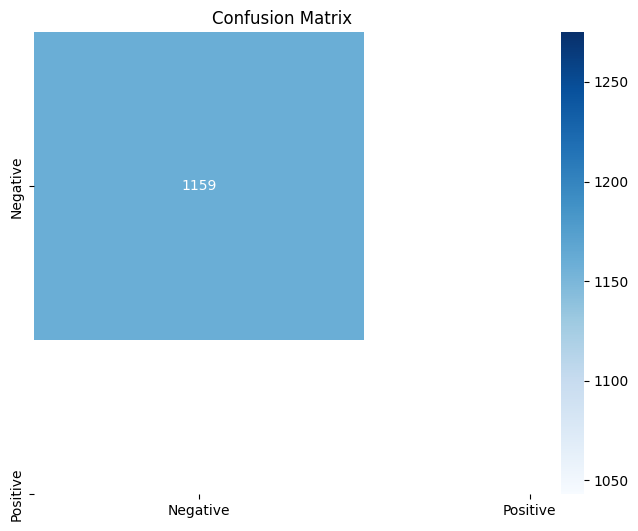

In [187]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(original, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')

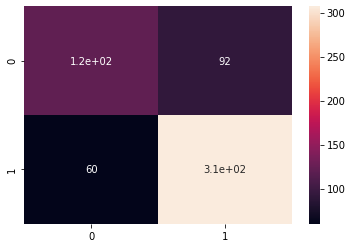

In [ ]:
# Plot the confusion matrix


**MINI CHALLENGE #8:**

- **Use a pretrained BERT model to make a sentiment analysis predictions**

# To Do:  Answer to notebook challenges (+ Extra challenge)
- **Deadline:** 6 March 2025 at 6:00pm **-> today!!**
- Send completed notebook. Notebook file name: **Student-Name_SSA_Project2025.ipynb**
- **Important:** each hour delay = -1pt

# **MINI CHALLENGE SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:** -> 1pt

- **How many unique elements are present in the 'sentiment' column? Try to find out with two different methods**

In [ ]:
# Code here

**MINI CHALLENGE #2 SOLUTION:**  -> 1pt
- **Remove punctuations using a different method**


In [ ]:
# Code here

**MINI CHALLENGE #3 SOLUTION:**  -> 2pt

- **Modify the code in order keep words that are longer than or equal 2 characters instead of 3**
- **Add 'https' to the list of stopwords and rerun the code**



In [ ]:
# Code here

**MINI CHALLENGE #4 SOLTUTION:**  -> 1pt
- **Visualize the wordcloud for tweets that have negative sentiment**

In [ ]:
# Code here

**MINI CHALLENGE #5 SOLUTION:** -> 2pt
- **Use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments**

In [ ]:
# Code here

**MINI CHALLENGE #6 SOLUTION:** -> 2pt

- **Change the padding length to 15 and rerun the code. Verify that padding was successful**


In [ ]:
# Code here

**MINI CHALLENGE #7 SOLUTION:** -> 3pt
- **Train the model using different embedding output dimension**

In [ ]:
# Code here

**MINI CHALLENGE #8 SOLTUTION:** -> 4pt

- **Use a pretrained BERT model to make a sentiment analysis predictions**

In [ ]:
# Code here

**EXTRA CHALLENGE :**  -> 4pt

- **Use LLM API (ChatGPT, Gemini ...) to assess sentiment analysis and compare confusion matrix for different approaches (LSTM, BERT, LLM API)**

In [ ]:
# Code here